# scipyを用いてvariogram, krigingを実装する

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import stats
import scipy.optimize as opt
import matplotlib.pyplot as plt

## scipyを用いた距離行列の作成・バリオグラムのプロット

In [2]:
n = 3
data = np.array([[np.random.normal(0, 10) for i in range(n)] for i in range(100)])
# x,y,zを生成

In [6]:
print(data)

[[ 18.36909197  -9.58988674 -11.50655068]
 [-10.59588687  -2.80501842   1.08341621]
 [-11.89187755   5.06953061  -0.81527736]
 [ -4.79386032   6.90010283  -2.59684756]
 [ -3.76339661   7.7593096  -10.71774132]
 [-21.00374387  -2.34652133   6.20279193]
 [  0.89712509  -8.74697833 -17.1858178 ]
 [ -8.0149992   -4.87954185  15.96538854]
 [ 11.69801967  10.05780523   6.59360356]
 [-17.30939319  14.49511606  -1.38371539]
 [  5.66817526   3.96043396   9.59311235]
 [  1.40000893 -19.95821569   8.45402105]
 [ -8.65780931  12.93138105   7.69993739]
 [ -1.82582415 -12.81917511  -7.67310455]
 [-20.10736073  -3.76180387   7.24155434]
 [  5.78556059  -6.93767649 -16.83725066]
 [  0.29647599 -13.29121413   8.73782327]
 [-29.03598064  -4.66486741   1.28670247]
 [ 13.73070098  -4.79995171   4.47525975]
 [-26.21117266  -0.07787161  19.0608661 ]
 [  1.69544816  10.62769137   6.26924453]
 [ -9.3109919   -7.07750224  -5.85882443]
 [ -8.50654993  -0.84505359  -0.90945347]
 [  0.64985737  -0.07818755   5.82

In [7]:
data[:, 0:2]

array([[ 18.36909197,  -9.58988674],
       [-10.59588687,  -2.80501842],
       [-11.89187755,   5.06953061],
       [ -4.79386032,   6.90010283],
       [ -3.76339661,   7.7593096 ],
       [-21.00374387,  -2.34652133],
       [  0.89712509,  -8.74697833],
       [ -8.0149992 ,  -4.87954185],
       [ 11.69801967,  10.05780523],
       [-17.30939319,  14.49511606],
       [  5.66817526,   3.96043396],
       [  1.40000893, -19.95821569],
       [ -8.65780931,  12.93138105],
       [ -1.82582415, -12.81917511],
       [-20.10736073,  -3.76180387],
       [  5.78556059,  -6.93767649],
       [  0.29647599, -13.29121413],
       [-29.03598064,  -4.66486741],
       [ 13.73070098,  -4.79995171],
       [-26.21117266,  -0.07787161],
       [  1.69544816,  10.62769137],
       [ -9.3109919 ,  -7.07750224],
       [ -8.50654993,  -0.84505359],
       [  0.64985737,  -0.07818755],
       [  1.70864352,   6.74002298],
       [ 17.1176632 ,  -3.68212431],
       [ -6.97394864,  11.64985903],
 

In [8]:
dist_vec = pdist(data[:, 0:2], 'euclidean')

In [9]:
print(dist_vec)

[29.74902414 33.62476458 28.43311652 ...  4.65871845  9.56899873
  6.99763473]


In [10]:
dist_mat = squareform(dist_vec)

In [11]:
print(dist_mat)

[[ 0.         29.74902414 33.62476458 ... 21.51438826 23.29085099
  30.22017324]
 [29.74902414  0.          7.98048334 ... 10.6591696  13.65232443
  12.63442375]
 [33.62476458  7.98048334  0.         ... 12.17703995 12.31603091
   7.30883894]
 ...
 [21.51438826 10.6591696  12.17703995 ...  0.          4.65871845
   9.56899873]
 [23.29085099 13.65232443 12.31603091 ...  4.65871845  0.
   6.99763473]
 [30.22017324 12.63442375  7.30883894 ...  9.56899873  6.99763473
   0.        ]]


In [12]:
z_mat = squareform(pdist(data[:, 2:], 'euclidean')**2/2)

In [13]:
[dist_mat, z_mat]

[array([[ 0.        , 29.74902414, 33.62476458, ..., 21.51438826,
         23.29085099, 30.22017324],
        [29.74902414,  0.        ,  7.98048334, ..., 10.6591696 ,
         13.65232443, 12.63442375],
        [33.62476458,  7.98048334,  0.        , ..., 12.17703995,
         12.31603091,  7.30883894],
        ...,
        [21.51438826, 10.6591696 , 12.17703995, ...,  0.        ,
          4.65871845,  9.56899873],
        [23.29085099, 13.65232443, 12.31603091, ...,  4.65871845,
          0.        ,  6.99763473],
        [30.22017324, 12.63442375,  7.30883894, ...,  9.56899873,
          6.99763473,  0.        ]]),
 array([[  0.        ,  79.25363311,  57.15166266, ...,  47.26555079,
           1.44426472,  33.9041855 ],
        [ 79.25363311,   0.        ,   1.80251862, ...,   4.11057929,
         102.09539551,   9.48468075],
        [ 57.15166266,   1.80251862,   0.        , ...,   0.46905687,
          76.76646732,   3.01766162],
        ...,
        [ 47.26555079,   4.11057929,

In [14]:
z_mat.shape

(100, 100)

In [15]:
z_vec = squareform(z_mat)

In [16]:
print(z_vec)

[79.25363311 57.15166266 39.69140487 ... 65.23421779  1.10726064
 49.34368071]


In [17]:
np.stack([dist_vec, z_vec])

array([[29.74902414, 33.62476458, 28.43311652, ...,  4.65871845,
         9.56899873,  6.99763473],
       [79.25363311, 57.15166266, 39.69140487, ..., 65.23421779,
         1.10726064, 49.34368071]])

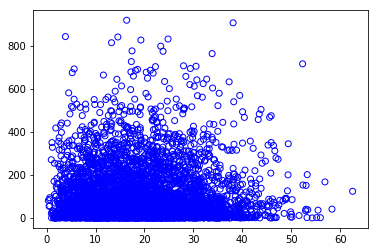

In [18]:
plt.scatter(dist_vec, pdist(data[:, 2:], 'euclidean')**2/2, facecolors='None', edgecolors='blue')

In [19]:
def get_diff(data):
    '''
    get the difference of spatial data
    input: (n,3) matrix data
    output: np.array(n,2)
    '''
    dist_vec = pdist(data[:, :2]) # calculate the distance between each pair of points
    z_vec = pdist(data[:, 2:])**2/2 # calculate the difference of the values in each pairwise
    diff = np.stack([dist_vec, z_vec])

    return diff

In [20]:
vario = get_diff(data)

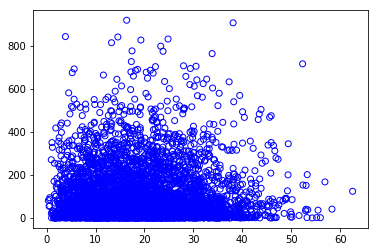

In [21]:
plt.scatter(vario[0], vario[1], facecolors='None', edgecolors='blue')

In [20]:
data = np.array([[np.random.normal(0, 10) for i in range(n)] for i in range(5000)])

In [21]:
%timeit variogram(data)

12.5 ms ± 435 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%timeit get_diff(data)

6.85 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
print(vario[0].flatten())

[16.78292826 28.19862844 28.5907092  ... 29.21649693  3.36496668
 30.98197786]


In [22]:
np.max(vario[0])

62.555728473042585

In [23]:
vario.shape

(2, 4950)

In [24]:
def emp_variogram(z_vario, lag_h):
    '''
    calculate empirical variogram
    input: difference of spatial (2, nC2)matrix,  bandwith of bins
    '''
    num_rank = int(np.max(z_vario[0]) / lag_h)
    bin_means, bin_edges, bin_number = stats.binned_statistic(z_vario[0], z_vario[1], statistic='mean', bins=num_rank)
    # bin_edgesに関しては最初のものを省く
    e_vario = np.stack([bin_edges[1:], bin_means[0:]], axis=0)
    e_vario = np.delete(e_vario, np.where(e_vario[1] <= 0), axis=1)

    return e_vario

In [25]:
print(emp_variogram(vario, 10))

[[ 10.7113263   21.08020673  31.44908717  41.8179676   52.18684804
   62.55572847]
 [ 97.20064995  94.17088114 101.73947641  93.25887981 120.5616173
  113.54240805]]


In [26]:
e_vario = emp_variogram(vario, 10)

In [27]:
e_vario[1]

array([87.24294981, 88.97077998, 96.14698839, 79.16667896])

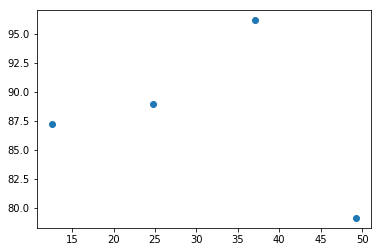

In [28]:
plt.scatter(e_vario[0], e_vario[1])

In [29]:
def liner_model(x, a, b):
    return a + b * x

In [30]:
def gaussian_model(x, a, b, c):
    return a + b * (1 - np.exp(-(x / c)**2))

In [31]:
def exponential_model(x, a, b, c):
    return a + b * (1 - np.exp(-(x / c)))

In [32]:
def spherical_model(x, a, b, c):
    cond = [x < c, x > c]
    func = [lambda x: a + (b / 2) * (3 * (x / c) - (x / c)**3), lambda x: a + b]
    return np.piecewise(x, cond, func)

In [33]:
def auto_fit(e_vario, fitting_range, selected_model):
    # フィッティングレンジまでで標本バリオグラムを削る
    data = np.delete(e_vario, np.where(e_vario[0] > fitting_range)[0], axis=1)
    if (selected_model == 0):
        param, cov = opt.curve_fit(liner_model, data[0], data[1])
    elif (selected_model == 1):
        param, cov = opt.curve_fit(gaussian_model, data[0], data[1], [0, 0, fitting_range])
    elif (selected_model == 2):
        param, cov = opt.curve_fit(exponential_model, data[0], data[1], [0, 0, fitting_range])
    elif (selected_model == 3):
        param, cov = opt.curve_fit(spherical_model, data[0], data[1], [0, 0, fitting_range])
    param = np.insert(param, 0, [selected_model, fitting_range])
    return param

In [36]:
param = auto_fit(e_vario, 120, 0)

In [37]:
print(param)

[  0.         120.          92.18921827  -0.13932167]


92.18921826557529 -0.13932166764313633


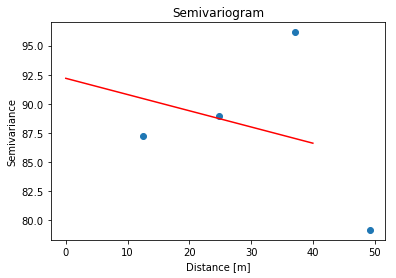

In [38]:
fig, ax = plt.subplots()
ax.plot(e_vario[0], e_vario[1], 'o')
xlim_arr = np.arange(0, np.max(e_vario[0]), 10)
if (param[0] == 0):
    ax.plot(xlim_arr, liner_model(xlim_arr, param[2], param[3]), 'r-')
    print(param[2], param[3])
elif (param[0] == 1):
    ax.plot(xlim_arr, gaussian_model(xlim_arr, param[2], param[3], param[4]), 'r-')
    print(xlim_arr, param[3], param[4])
elif (param[0] == 2):
    ax.plot(xlim_arr, exponential_model(xlim_arr, param[2], param[3], param[4]), 'r-')
    print(param[2], param[3], param[4])
elif (param[0] == 3):
    ax.plot(xlim_arr, spherical_model(xlim_arr, param[2], param[3], param[4]), 'r-')
    print(param[2], param[3], param[4])
# グラフのタイトルの設定
ax.set_title('Semivariogram')
# 軸ラベルの設定
# ax.set_xlim([0, np.max(e_vario[0])])
# ax.set_ylim([0, np.max(e_vario[1])])
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Semivariance')
# グラフの描画
plt.show()

In [59]:
def plot_semivario(e_vario, param):
    fig, ax = plt.subplots()
    ax.plot(e_vario[0], e_vario[1], 'o')
    xlim_arr = np.arange(0, np.max(e_vario[0])+10, 10)
    print(xlim_arr)
    if (param[0] == 0):
        ax.plot(xlim_arr, liner_model(xlim_arr, param[2], param[3]), 'r-')
        print(param[2], param[3])
    elif (param[0] == 1):
        ax.plot(xlim_arr, gaussian_model(xlim_arr, param[2], param[3], param[4]), 'r-')
        print(xlim_arr, param[3], param[4])
    elif (param[0] == 2):
        ax.plot(xlim_arr, exponential_model(xlim_arr, param[2], param[3], param[4]), 'r-')
        print(param[2], param[3], param[4])
    elif (param[0] == 3):
        ax.plot(xlim_arr, spherical_model(xlim_arr, param[2], param[3], param[4]), 'r-')
        print(param[2], param[3], param[4])
    # グラフのタイトルの設定
    ax.set_title('Semivariogram')
    # 軸ラベルの設定
    # ax.set_xlim([0, np.max(e_vario[0])])
    # ax.set_ylim([0, np.max(e_vario[1])])
    ax.set_xlabel('Distance [m]')
    ax.set_ylabel('Semivariance')
    # グラフの描画
    return fig

### autochoice関数を作成する
 - calculate the empirical variogram and the residuals under the defined number of lags
 - compare the residuals among the models and choose the best model
     - 誤差二乗和の最小化 or 絶対値和の最小化

In [40]:
print(e_vario)

[[12.55711273 24.79685095 37.03658918 49.2763274 ]
 [87.24294981 88.97077998 96.14698839 79.16667896]]


In [42]:
liner_model(e_vario[0], param[2], param[3])**2

array([8179.34663983, 7873.80787668, 7574.08494191, 7280.17783553])

In [45]:
e_vario[0].sum()

123.66688026466065

[ 0. 10. 20. 30. 40. 50.]
92.18921614273273 -6867.8156247333345 73942.03252814428


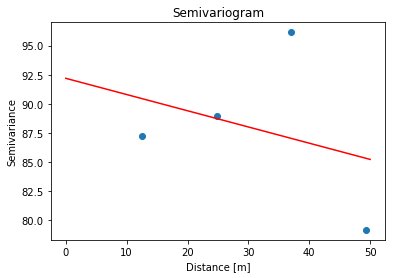

In [70]:
resid = None
model_num = None
model_param = None
for i in range(0, 4):
    param = auto_fit(e_vario, 100, i)
    if i == 0:
        theoritical_vario = liner_model(e_vario[0], param[2], param[3])**2
        resid_sum = theoritical_vario.sum()
    if i == 1:
        theoritical_vario = gaussian_model(e_vario[0], param[2], param[3], param[4])**2
        resid_sum = theoritical_vario.sum()
    if i == 2:
        theoritical_vario = exponential_model(e_vario[0], param[2], param[3], param[4])**2
        resid_sum = theoritical_vario.sum()
    if i == 3:
        theoritical_vario = spherical_model(e_vario[0], param[2], param[3], param[4])**2
        resid_sum = theoritical_vario.sum()
    if resid is None or resid_sum < resid:
        resid = resid_sum
        model_num = i
        model_param = param
test_vario = plot_semivario(e_vario, model_param)

In [ ]:
def choose_model(e_vario):
    resid = None
    model_num = None
    model_param = None
    for i in range(0, 4):
        param = auto_fit(e_vario, 100, i)
        if i == 0:
            theoritical_vario = liner_model(e_vario[0], param[2], param[3])**2
            resid_sum = theoritical_vario.sum()
        if i == 1:
            theoritical_vario = gaussian_model(e_vario[0], param[2], param[3], param[4])**2
            resid_sum = theoritical_vario.sum()
        if i == 2:
            theoritical_vario = exponential_model(e_vario[0], param[2], param[3], param[4])**2
            resid_sum = theoritical_vario.sum()
        if i == 3:
            theoritical_vario = spherical_model(e_vario[0], param[2], param[3], param[4])**2
            resid_sum = theoritical_vario.sum()
        if resid is None or resid_sum < resid:
            resid = resid_sum
            model_param = param
    best_vario = plot_semivario(e_vario, model_param)
    return model_param, resid, best_vario

[ 0. 10. 20. 30. 40. 50.]
92.18921614273273 -6867.8156247333345 73942.03252814428


(array([ 3.00000000e+00,  1.00000000e+02,  9.21892161e+01, -6.86781562e+03,
         7.39420325e+04]),
 30907.41719508502,
 <Figure size 432x288 with 1 Axes>)

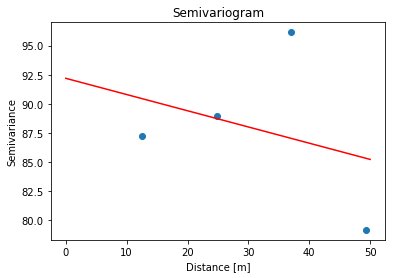

In [92]:
choose_model(e_vario)

In [93]:
e_vario2 = emp_variogram(vario, 5)

[ 0. 10. 20. 30. 40. 50.]
100.26880138211662 -143681.89400026485 232440.44065653428


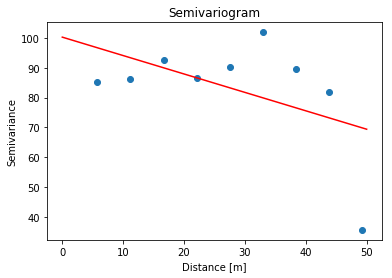

In [96]:
test_param, test_res, test_fig = choose_model(e_vario2)

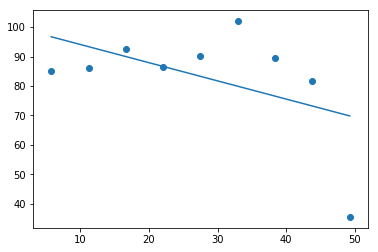

In [101]:
plt.plot(e_vario2[0], exponential_model(e_vario2[0], test_param[2], test_param[3], test_param[4]))
plt.scatter(e_vario2[0], e_vario2[1])

In [ ]:
min_resid = None
lag_num = 0
for lag in range(3, 11):
    e_vario = emp_variogram(vario, lag)
    param, resid, vario_plot = choose_model(e_vario)
    resid = resid/len(e_vario[0])
    print(param)
    if min_resid is None or resid < min_resid:
        min_resid = resid
        lag_num = lag
        model_param = param
        fig = vario_plot
print('=======')
print([lag_num, model_param])

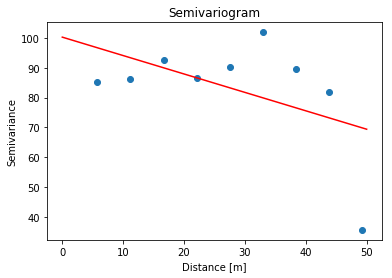

In [109]:
fig

In [ ]:
def auto_vario(data, lag_rang):
    min_resid = None
    lag_num = 0
    for lag in range(3, 11):
        e_vario = emp_variogram(vario, lag)
        param, resid, vario_plot = choose_model(e_vario)
        resid = resid/len(e_vario[0])
        print(param)
        if min_resid is None or resid < min_resid:
            min_resid = resid
            lag_num = lag
            model_param = param
            fig = vario_plot
    return model_param, lag_num, fig

[ 0. 10. 20. 30. 40. 50.]
98.12982388871643 -0.5492778159907613
[  0.         100.          98.12982389  -0.54927782]
[ 0. 10. 20. 30. 40. 50.]
96.42960487125967 -231559.43941676192 531741.3019859705
[ 2.00000000e+00  1.00000000e+02  9.64296049e+01 -2.31559439e+05
  5.31741302e+05]
[ 0. 10. 20. 30. 40. 50.]
100.26880138211662 -143681.89400026485 232440.44065653428
[ 2.00000000e+00  1.00000000e+02  1.00268801e+02 -1.43681894e+05
  2.32440441e+05]
[ 0. 10. 20. 30. 40. 50.]
97.6248072601477 -40363.880105296164 131793.78011332717
[ 3.00000000e+00  1.00000000e+02  9.76248073e+01 -4.03638801e+04
  1.31793780e+05]
[ 0. 10. 20. 30. 40. 50.]
98.71432923460779 -236795.4805232584 474311.03608673037
[ 2.00000000e+00  1.00000000e+02  9.87143292e+01 -2.36795481e+05
  4.74311036e+05]
[ 0. 10. 20. 30. 40. 50.]
94.59632357051392 -152793.96805585234 516783.8061179643
[ 2.00000000e+00  1.00000000e+02  9.45963236e+01 -1.52793968e+05
  5.16783806e+05]
[ 0. 10. 20. 30. 40. 50.]
92.32920141726012 -0.17666572

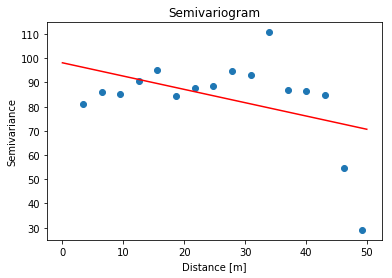

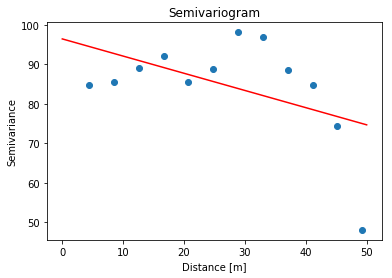

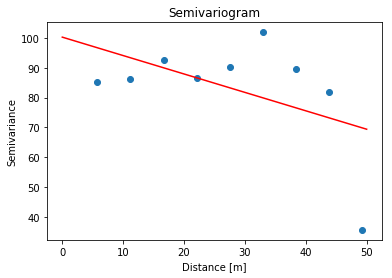

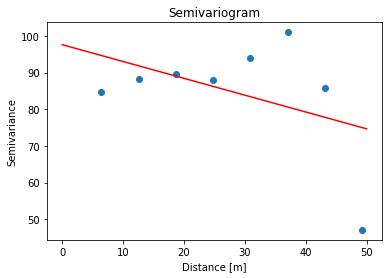

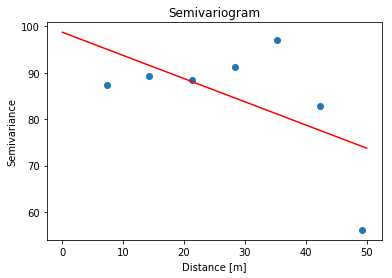

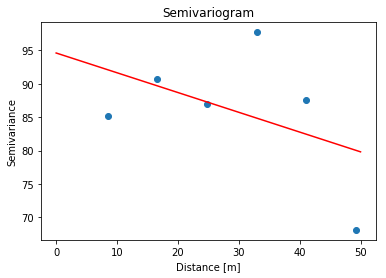

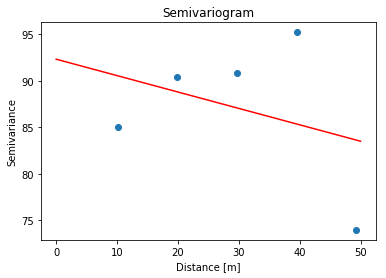

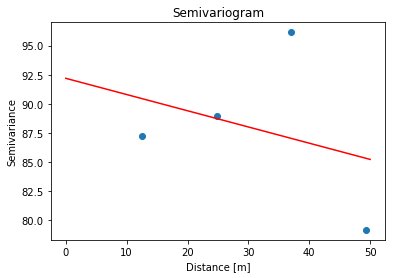

In [113]:
param, lag_num, fig = auto_vario(vario, range(3,11))

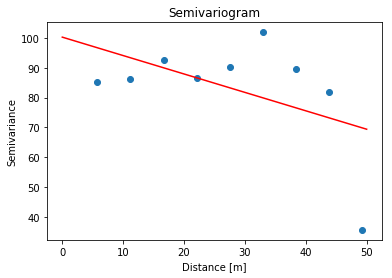

In [114]:
fig